In [ ]:
!pip install earth2studio[fcn]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.1/56.1 kB 5.1 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of gcsfs to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 115.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 127.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 806.0/806.0 kB 52.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.3/199.3 kB 22.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 276.4/276.4 kB 26.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 84.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 343.1/343.1 kB 34.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.6/61.6 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 9.3 MB/s

In [2]:
# from earth2studio.models.px import DLWP
# from earth2studio.models.px.aifs import AIFS
# from earth2studio.models.px.aurora import Aurora
# from earth2studio.models.px.dlesym import DLESyM, DLESyMLatLon
from earth2studio.models.px.fcn import FCN
from earth2studio.data import GFS
from earth2studio.data import NCAR_ERA5
from earth2studio.io import NetCDF4Backend
from earth2studio.run import deterministic as run

model = FCN.load_model(FCN.load_default_package())
ds = GFS()
io = NetCDF4Backend("output.nc")

run(["2024-01-01"], 10, model, ds, io)

2025-10-01 12:26:29.290 | INFO     | earth2studio.run:deterministic:75 - Running simple workflow!
2025-10-01 12:26:29.291 | INFO     | earth2studio.run:deterministic:82 - Inference device: cuda


Fetching GFS data:   0%|          | 0/26 [00:00<?, ?it/s]

2025-10-01 12:26:30.190 | DEBUG    | earth2studio.data.gfs:fetch_array:380 - Fetching GFS grib file: noaa-gfs-bdp-pds/gfs.20240101/00/atmos/gfs.t00z.pgrb2.0p25.f000 252556659-958137
2025-10-01 12:26:30.193 | DEBUG    | earth2studio.data.gfs:fetch_array:380 - Fetching GFS grib file: noaa-gfs-bdp-pds/gfs.20240101/00/atmos/gfs.t00z.pgrb2.0p25.f000 199346060-588823
2025-10-01 12:26:30.197 | DEBUG    | earth2studio.data.gfs:fetch_array:380 - Fetching GFS grib file: noaa-gfs-bdp-pds/gfs.20240101/00/atmos/gfs.t00z.pgrb2.0p25.f000 253514796-920355
2025-10-01 12:26:30.199 | DEBUG    | earth2studio.data.gfs:fetch_array:380 - Fetching GFS grib file: noaa-gfs-bdp-pds/gfs.20240101/00/atmos/gfs.t00z.pgrb2.0p25.f000 199934883-595444
2025-10-01 12:26:30.202 | DEBUG    | earth2studio.data.gfs:fetch_array:380 - Fetching GFS grib file: noaa-gfs-bdp-pds/gfs.20240101/00/atmos/gfs.t00z.pgrb2.0p25.f000 246334297-805355
2025-10-01 12:26:30.205 | DEBUG    | earth2studio.data.gfs:fetch_array:380 - Fetching GFS 

Fetching GFS data: 100%|██████████| 26/26 [00:03<00:00,  8.43it/s]


2025-10-01 12:26:33.408 | SUCCESS  | earth2studio.run:deterministic:106 - Fetched data from GFS
2025-10-01 12:26:33.424 | INFO     | earth2studio.run:deterministic:136 - Inference starting!



Running inference: 100%|██████████| 11/11 [00:04<00:00,  2.31it/s]

2025-10-01 12:26:38.184 | SUCCESS  | earth2studio.run:deterministic:146 - Inference complete


In [3]:
!ls

output.nc  sample_data


In [4]:
import xarray as xr
ds_fcn = xr.open_dataset('output.nc')
ds_fcn

<xarray.Dataset> Size: 1GB
Dimensions:    (time: 1, lead_time: 11, lat: 720, lon: 1440)
Coordinates:
  * time       (time) datetime64[ns] 8B 2024-01-01
  * lead_time  (lead_time) int64 88B 0 6 12 18 24 30 36 42 48 54 60
  * lat        (lat) float64 6kB 90.0 89.75 89.5 89.25 ... -89.25 -89.5 -89.75
  * lon        (lon) float64 12kB 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
Data variables: (12/26)
    u10m       (time, lead_time, lat, lon) float32 46MB ...
    v10m       (time, lead_time, lat, lon) float32 46MB ...
    t2m        (time, lead_time, lat, lon) float32 46MB ...
    sp         (time, lead_time, lat, lon) float32 46MB ...
    msl        (time, lead_time, lat, lon) float32 46MB ...
    t850       (time, lead_time, lat, lon) float32 46MB ...
    ...         ...
    u100m      (time, lead_time, lat, lon) float32 46MB ...
    v100m      (time, lead_time, lat, lon) float32 46MB ...
    u250       (time, lead_time, lat, lon) float32 46MB ...
    v250       (time, lead_time, lat, lon) float32 46MB ...
    z250       (time, lead_time, lat, lon) float32 46MB ...
    t250       (time, lead_time, lat, lon) float32 46MB ...

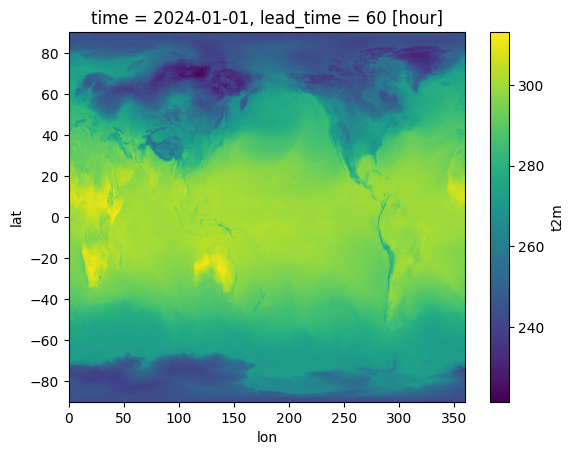

In [5]:
ds_fcn.t2m.isel(time=0, lead_time=10).plot()